In [140]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
from datetime import timedelta
import re
import hvplot.pandas
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree


In [141]:
lac_2022_df = pd.read_csv("../data/lac_2022_off_clean")
lac_2022_df.head()

,week,OPP,OPP Score,LAC Score,Time,Quarter,Location,yards_to_endzone,Detail,Down,...,pass_incomplete,pass_yards_tally,intercepted,fumble,punt,field goal att,sacked,sack_yards,possession_team,team change
0,1,LVR,0,0,15:00,1,LAC 25,75,Austin Ekeler left tackle for 8 yards (tackle ...,1,...,0,0,0,0,0,0,0,0,LAC,0
1,1,LVR,0,0,14:45,1,LAC 33,67,Justin Herbert pass complete short right to Ke...,2,...,0,0,0,0,0,0,0,0,LAC,0
2,1,LVR,0,0,14:07,1,LAC 34,66,Zander Horvath up the middle for 2 yards (tack...,3,...,0,0,0,0,0,0,0,0,LAC,0
3,1,LVR,0,0,13:24,1,LAC 36,64,Austin Ekeler right tackle for 2 yards (tackle...,1,...,0,0,0,0,0,0,0,0,LAC,0
4,1,LVR,0,0,12:50,1,LAC 38,62,Justin Herbert pass complete short left to Jos...,2,...,0,9,0,0,0,0,0,0,LAC,0


In [142]:
lac_off_df = lac_2022_df.astype({'LAC Score': 'int8', 'OPP Score': 'int8','Down':'int8','Down':'int8','Quarter': 'int8','OPP':'string','week':'int8','rush_length':'int8','yardage_diff_2_3':'int8','yardage_diff_1_2':'int8','ToGo':'int8','rush_length':'int8','pass_length':'int8','1D_conv_good':'int8','2D_conv_good':'int8','3D_conv_good':'int8','3D_conv_good':'int8','4D_conv_good':'int8','rush_play':'int8','rush_yards_tally':'int8','pass_play':'int8','pass_complete':'int8','pass_incomplete':'int8','pass_yards_tally':'int8','intercepted':'int8','fumble':'int8','punt':'int8','field goal att':'int8','sacked':'int8','sack_yards':'int8','team change':'int8','possession_team':'string','Location':'string','Detail':'string','yards_to_endzone':'int8'})
lac_off_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   week              1232 non-null   int8  
 1   OPP               1232 non-null   string
 2   OPP Score         1232 non-null   int8  
 3   LAC Score         1232 non-null   int8  
 4   Time              1232 non-null   object
 5   Quarter           1232 non-null   int8  
 6   Location          1232 non-null   string
 7   yards_to_endzone  1232 non-null   int8  
 8   Detail            1232 non-null   string
 9   Down              1232 non-null   int8  
 10  ToGo              1232 non-null   int8  
 11  yardage_diff_1_2  1232 non-null   int8  
 12  yardage_diff_2_3  1232 non-null   int8  
 13  rush_length       1232 non-null   int8  
 14  pass_length       1232 non-null   int8  
 15  1D_conv_good      1232 non-null   int8  
 16  2D_conv_good      1232 non-null   int8  
 17  3D_conv_good  

In [143]:
lac_off_df.head()

,week,OPP,OPP Score,LAC Score,Time,Quarter,Location,yards_to_endzone,Detail,Down,...,pass_incomplete,pass_yards_tally,intercepted,fumble,punt,field goal att,sacked,sack_yards,possession_team,team change
0,1,LVR,0,0,15:00,1,LAC 25,75,Austin Ekeler left tackle for 8 yards (tackle ...,1,...,0,0,0,0,0,0,0,0,LAC,0
1,1,LVR,0,0,14:45,1,LAC 33,67,Justin Herbert pass complete short right to Ke...,2,...,0,0,0,0,0,0,0,0,LAC,0
2,1,LVR,0,0,14:07,1,LAC 34,66,Zander Horvath up the middle for 2 yards (tack...,3,...,0,0,0,0,0,0,0,0,LAC,0
3,1,LVR,0,0,13:24,1,LAC 36,64,Austin Ekeler right tackle for 2 yards (tackle...,1,...,0,0,0,0,0,0,0,0,LAC,0
4,1,LVR,0,0,12:50,1,LAC 38,62,Justin Herbert pass complete short left to Jos...,2,...,0,9,0,0,0,0,0,0,LAC,0


In [144]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(lac_off_df):
    # Filter rows based on column: 'Down'
    lac_off_df = lac_off_df[lac_off_df['Down'] == 3]
    # Drop columns: 'team change', 'possession_team' and 10 other columns
    lac_off_df = lac_off_df.drop(columns=['possession_team', 'Location','OPP','Detail', 'team change', 'Time','possession_team', 'intercepted', '4D_conv_good', 'rush_play', 'fumble','pass_play', 'punt', 'field goal att', 'sack_yards', '2D_conv_good', '1D_conv_good'])
    return lac_off_df

lac_off_df_clean = clean_data(lac_off_df.copy())
lac_off_df_clean.head()

,week,OPP Score,LAC Score,Quarter,yards_to_endzone,Down,ToGo,yardage_diff_1_2,yardage_diff_2_3,rush_length,pass_length,3D_conv_good,rush_yards_tally,pass_complete,pass_incomplete,pass_yards_tally,sacked
2,1,0,0,1,66,3,1,0,0,2,0,1,10,0,0,0,0
7,1,0,0,1,51,3,8,0,-2,0,25,1,14,1,0,34,0
10,1,0,0,1,25,3,9,0,4,0,0,0,14,0,1,35,0
13,1,3,3,1,52,3,2,0,5,0,0,0,14,0,0,43,0
19,1,3,3,2,5,3,4,0,3,3,0,0,15,0,0,107,0


In [145]:
#"""
#Cell generated by Data Wrangler.
#"""
#def clean_data(lac_off_df):
#    # Drop columns: 'team change', 'possession_team' and 3 other columns
#    #lac_off_df = lac_off_df.drop(columns=['OPP','OPP Score','possession_team', 'Location', 'Time','Detail', 'team change','punt','fumble','field goal att','LAC Score'])
#    lac_off_df = lac_off_df.drop(columns=['OPP','OPP Score','possession_team', 'Location','Down', 'Time','Detail', 'team change','punt','fumble','field goal att','LAC Score'])
#    return lac_off_df
#
#lac_off_df_clean = clean_data(lac_off_df.copy())
#
#lac_off_df_clean.info()
#
## Drop columns: 'team change', 'possession_team' and 3 other columns
##lac_off_df = lac_off_df.drop(columns=['OPP','possession_team', 'Location', 'Time', 'Detail'])

In [146]:
X=lac_off_df_clean.copy()
X.drop("3D_conv_good", axis=1, inplace=True)

X.head()

,week,OPP Score,LAC Score,Quarter,yards_to_endzone,Down,ToGo,yardage_diff_1_2,yardage_diff_2_3,rush_length,pass_length,rush_yards_tally,pass_complete,pass_incomplete,pass_yards_tally,sacked
2,1,0,0,1,66,3,1,0,0,2,0,10,0,0,0,0
7,1,0,0,1,51,3,8,0,-2,0,25,14,1,0,34,0
10,1,0,0,1,25,3,9,0,4,0,0,14,0,1,35,0
13,1,3,3,1,52,3,2,0,5,0,0,14,0,0,43,0
19,1,3,3,2,5,3,4,0,3,3,0,15,0,0,107,0


In [147]:
# Define target vector
y=lac_off_df_clean["3D_conv_good"].ravel()
y[:5]

array([1, 1, 0, 0, 0], dtype=int8)

In [148]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=617)

In [149]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [150]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [151]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [152]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=50, random_state=78)

In [153]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

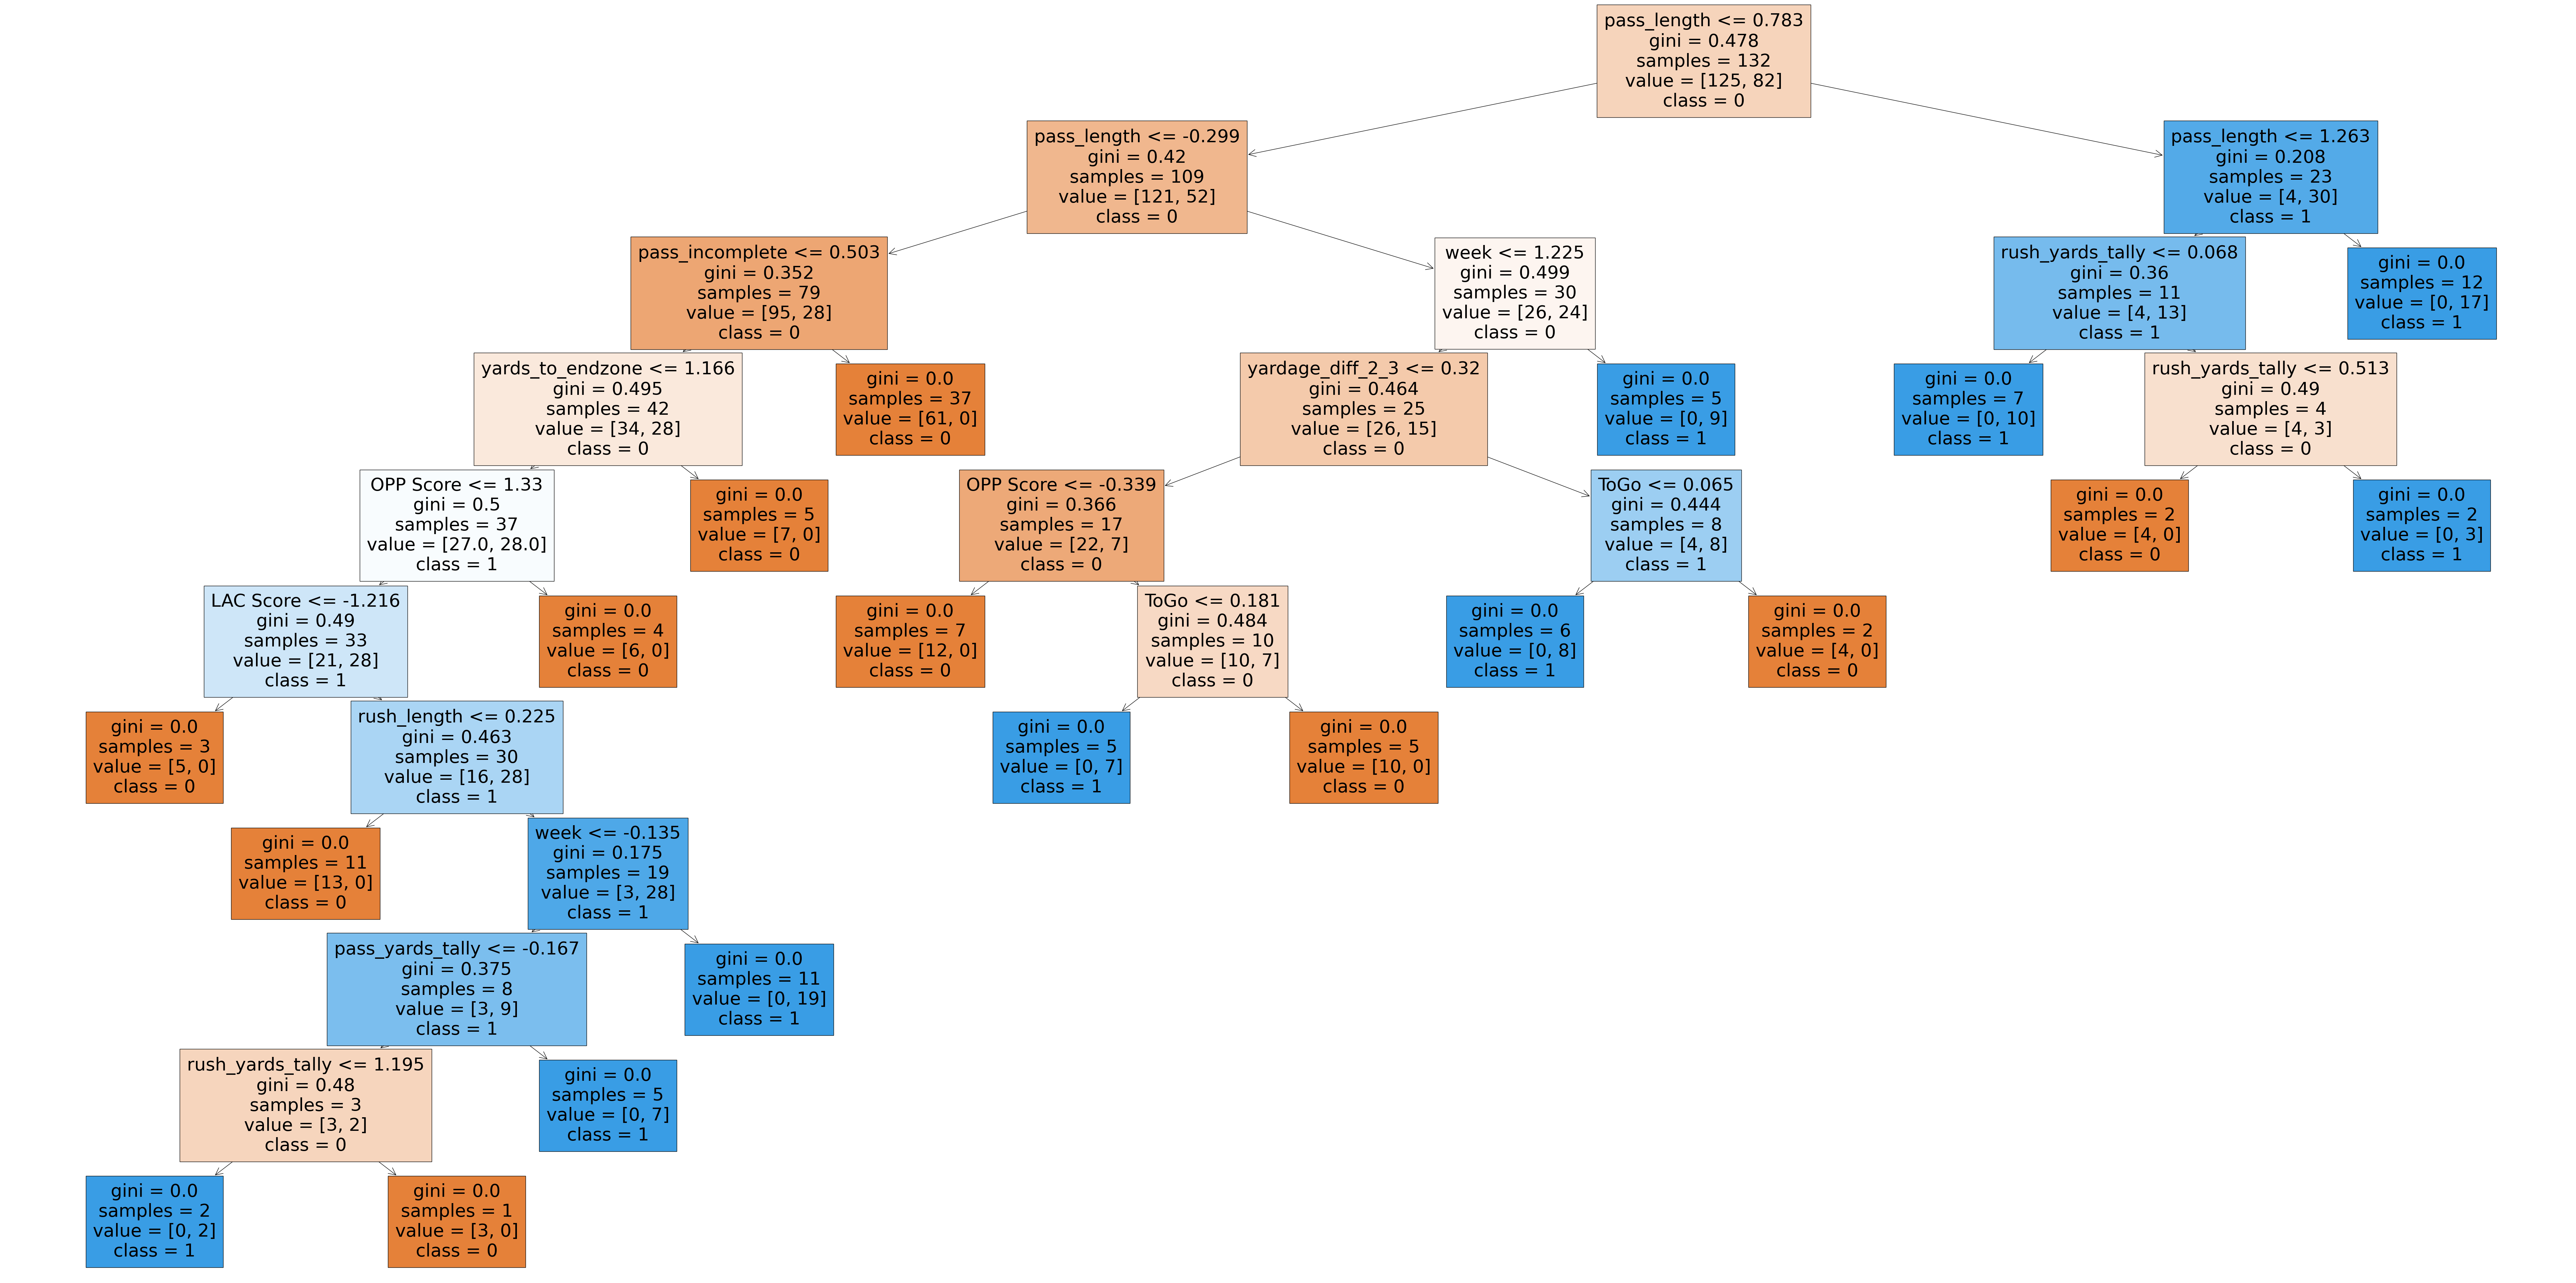

In [154]:
plt.figure(figsize=(100, 50))
plot_tree(rf_model.estimators_[32], feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.show()

In [155]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [156]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [157]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,41,2
Actual 1,5,22


Accuracy Score : 0.9
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        43
           1       0.92      0.81      0.86        27

    accuracy                           0.90        70
   macro avg       0.90      0.88      0.89        70
weighted avg       0.90      0.90      0.90        70



In [158]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.2201075901269553, 'pass_length'),
 (0.14410545446844586, 'ToGo'),
 (0.113340037383553, 'rush_length'),
 (0.09591113984653812, 'pass_incomplete'),
 (0.09134996546203919, 'pass_complete'),
 (0.053321490080690905, 'pass_yards_tally'),
 (0.0526327826365635, 'rush_yards_tally'),
 (0.05247217492912579, 'yards_to_endzone'),
 (0.04984806052233218, 'yardage_diff_2_3'),
 (0.043259114221885886, 'week'),
 (0.031707234996515204, 'OPP Score'),
 (0.026841860019522903, 'LAC Score'),
 (0.014571328363848939, 'Quarter'),
 (0.010531766941983357, 'sacked'),
 (0.0, 'yardage_diff_1_2'),
 (0.0, 'Down')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

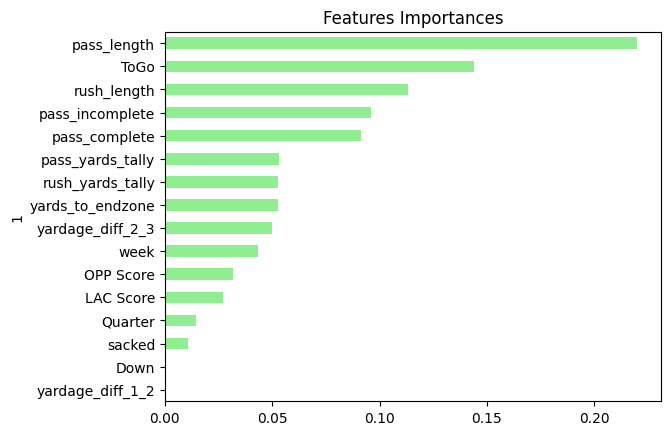

In [159]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [160]:
feature_names = X_train.columns
print(feature_names)

Index(['week', 'OPP Score', 'LAC Score', 'Quarter', 'yards_to_endzone', 'Down',
       'ToGo', 'yardage_diff_1_2', 'yardage_diff_2_3', 'rush_length',
       'pass_length', 'rush_yards_tally', 'pass_complete', 'pass_incomplete',
       'pass_yards_tally', 'sacked'],
      dtype='object')
